In [1]:
#imports all necessary libraries
import requests
import sys
import os
import re
import allel
import math
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open('clinvar.vcf', mode='r') as vcf:
    print(vcf.read())

In [2]:
#Gets the gene symbol used to search in gnomad api (clean up what is found in the clinvar file)
callset = allel.read_vcf('clinvar.vcf', fields=['variants/GENEINFO']) #Reads the gene info
tempGeneName = callset['variants/GENEINFO']
tempGeneName2 = []
#Removes duplicates
for i in tempGeneName: 
    if i not in tempGeneName2:
        tempGeneName2.append(i)

#Removes whitespace
if '' in tempGeneName2:
    tempGeneName2.remove('')

#Gene Symbol
gene_name = []  
for i in tempGeneName2:
    colon = i.split(':',1)
    gene_name.append(colon[0])

In [2]:
#Gets a canonical transcipt id from the gnomad API
def get_ensembl_id(gene_symbol):
    query = """
    {
        gene(gene_name: "%s") {
        canonical_transcript_id
        }     
    }""" % gene_symbol
    res = requests.post('https://gnomad.broadinstitute.org/api', json={'query': query})
    if res.ok:
        #print("Canonical ID retrieved:" + res.json()['data']['gene']['canonical_transcript_id'])
        return res.json()['data']['gene']['canonical_transcript_id']
    else:
        res.raise_for_status()
        return "error"
#Adapted from https://github.com/xjenny2/phospho-programs/blob/master/gnomad.py

In [3]:
#Gets a protein sequence in FASTA format given the ensembl ID
def get_protein_sequence(canonical_transcript):
    server = "http://grch37.rest.ensembl.org"
    ext = "/sequence/id/" + canonical_transcript + "?content-type=text/x-fasta;type=protein"
    r = requests.get(server + ext, headers={"Content-Type": "text/x-fasta"})

    if not r.ok:
        r.raise_for_status()
        sys.exit()
        return "error"
    seqlist = r.text.split("\n", 1)

    sequence = seqlist[1]
    sequence = sequence.replace("\n", "")

    #print("Sequence found")
    return sequence
#Adapted from https://github.com/xjenny2/phospho-programs/blob/master/ensembl.py

In [11]:
#x = get_ensembl_id('TFIP11')
canonical_id = ['ENST00000361390']
#canonical_id.append(x)
#print(canonical_id)
#for x in gene_name:
 #   ensembl_id = get_ensembl_id(x)
   # canonical_id.append(ensembl_id)

protein_sequence = []
for x in canonical_id:
    protein_seq = get_protein_sequence(x)
    protein_sequence.append(protein_seq)
    
print(protein_sequence)

['MPMANLLLLIVPILIAMAFLMLTERKILGYMQLRKGPNVVGPYGLLQPFADAMKLFTKEPLKPATSTITLYITAPTLALTIALLLWTPLPMPNPLVNLNLGLLFILATSSLAVYSILWSGWASNSNYALIGALRAVAQTISYEVTLAIILLSTLLMSGSFNLSTLITTQEHLWLLLPSWPLAMMWFISTLAETNRTPFDLAEGESELVSGFNIEYAAGPFALFFMAEYTNIIMMNTLTTTIFLGTTYDALSPELYTTYFVTKTLLLTSLFLWIRTAYPRFRYDQLMHLLWKNFLPLTLALLMWYVSMPITISSIPPQT']


In [6]:
#Calculates the frequency of methionine in the given index range of a sequence
def methionineCounter(sequence, initial, end):
    portion = sequence[initial:end]
    #print(portion)
    count = 0
    for i in portion:
        if i == 'M':
            count = count + 1
            
    methionineCounter.freq = count/len(portion)
    #print(freq)

In [7]:
#Defines a new array for each range
zero_ten =[]
ten_twenty =[]
twenty_thirty =[]
thirty_forty =[]
forty_fifty=[]
fifty_sixty=[]
sixty_seventy=[]
seventy_eighty=[]
eighty_ninety=[]
ninety_hundred =[]

In [8]:
#For each protein sequence, runs the methionineCounter function and appends to the respective array the frequency of methionine
for x in protein_sequence:
    count = 0
    for i in x:
        if i == 'M':
            count += 1
    sub_seq = math.floor(len(x)/10) #is it better to round up or down?
    print(sub_seq)
    zero = 1
    ten = sub_seq
    twenty = 2 * sub_seq
    thirty = 3 * sub_seq
    forty = 4 * sub_seq
    fifty = 5 * sub_seq
    sixty = 6 * sub_seq
    seventy = 7 * sub_seq
    eighty = 8 * sub_seq
    ninety = 9* sub_seq
    hundred = len(x)
    methionineCounter(x, zero, ten, count)
    zero_ten.append(methionineCounter.freq)
    methionineCounter(x, ten, twenty, count)
    ten_twenty.append(methionineCounter.freq)
    methionineCounter(x, twenty, thirty, count)
    twenty_thirty.append(methionineCounter.freq)
    methionineCounter(x, thirty, forty, count)
    thirty_forty.append(methionineCounter.freq)
    methionineCounter(x, forty, fifty, count)
    forty_fifty.append(methionineCounter.freq)
    methionineCounter(x, fifty, sixty, count)
    fifty_sixty.append(methionineCounter.freq)
    methionineCounter(x, sixty, seventy, count)
    sixty_seventy.append(methionineCounter.freq)
    methionineCounter(x, seventy, eighty, count)
    seventy_eighty.append(methionineCounter.freq)
    methionineCounter(x, eighty, ninety, count)
    eighty_ninety.append(methionineCounter.freq)
    methionineCounter(x, ninety, hundred, count)
    ninety_hundred.append(methionineCounter.freq)
    print(zero, ten, twenty, thirty, forty, fifty, sixty, seventy, eighty, ninety, hundred)

68
1 68 136 204 272 340 408 476 544 612 681
74
1 74 148 222 296 370 444 518 592 666 749
64
1 64 128 192 256 320 384 448 512 576 642
61
1 61 122 183 244 305 366 427 488 549 611
16
1 16 32 48 64 80 96 112 128 144 165
204
1 204 408 612 816 1020 1224 1428 1632 1836 2045


In [9]:
#Adds to a new dictionary - range and the average frequency of the methionines in all the protein sequences
freq_dict = {}
freq_dict['zero_ten']=mean(zero_ten)
freq_dict['ten_twenty']=mean(ten_twenty)
freq_dict['twenty_thirty']=mean(twenty_thirty)
freq_dict['thirty_forty']=mean(thirty_forty)
freq_dict['forty_fifty']=mean(forty_fifty)
freq_dict['fifty_sixty']=mean(fifty_sixty)
freq_dict['sixty_seventy']=mean(sixty_seventy)
freq_dict['seventy_eighty']=mean(seventy_eighty)
freq_dict['eighty_ninety']=mean(eighty_ninety)
freq_dict['ninety_hundred']=mean(ninety_hundred)

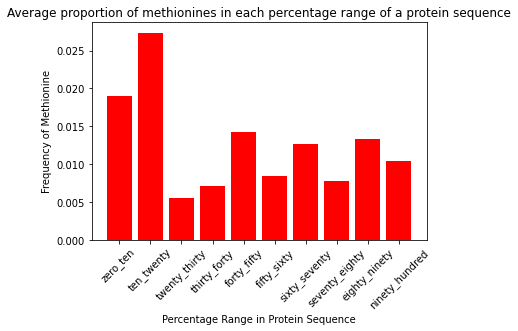

In [10]:
#Creates a plot of occurence of methionines in each percentage range of a protein sequence
plt.bar(list(freq_dict.keys()), freq_dict.values(), color = 'r')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Methionine')
plt.xlabel('Percentage Range in Protein Sequence')
plt.title('Average proportion of methionines in each percentage range of a protein sequence')
plt.show()